# K-Neareset Neighbors

This notebook will use the **Digits** data set bundled with *scikit-learn* to implement **K-Neareset Neighbors**.
This is a simple machine learning algorithm that is very popular. The *scikit-learn* estimator will use the `fit` method to implement **KNN**. This estimator  will look at the *k-nearest* neighbors to make predictions. It is said to be *lazy* since the work is performed only when used to make predictions. By default **KNN** looks at the five nearest neighbors to make its predictions. The default estimator will be mostly used for simplicity. This notebook will inspect the data, prepare data for fiting, fit the model, and review the results. The end of this example will include **KFolds** and testing multiple models for best accuracy.

__[More info on KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)__

__[More info on Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)__


In [1]:
# Load_digits returns Bunch object containing the digits and information
from sklearn.datasets import load_digits
# Load_digits will flatten each 2D array into 1D array
digits = load_digits()

In [2]:
# print description of dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Inspect the data

**It is benificial to inspect the data and become familiar with its details**

First we will ensure the dimensions are compatible for the next step

In [3]:
# display the target value of every 100th sample
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [4]:
# confirm the number of samples and features per sample
digits.data.shape

(1797, 64)

In [5]:
# confirm number of targets
digits.target.shape

(1797,)

**We can explore our data by using matplotlib visualization toools.** 

The data array contains 1797 samples, each with 64 features in the range of 1-16, representing the intesity of the pixels.

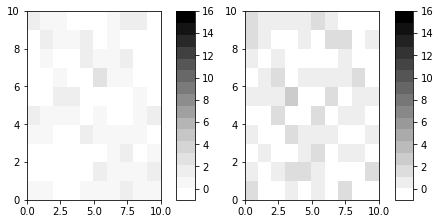

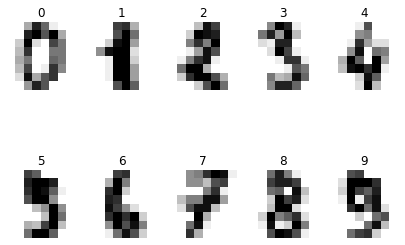

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        data = np.random.randn(10, 10)
        psm = ax.pcolormesh(data, cmap=cmap, vmin=-1, vmax=16)
        fig.colorbar(psm, ax=ax)
    plt.show()
     
g1 = cm.get_cmap('Greys', 16)
g2 = cm.get_cmap('gray_r', 16)
plot_examples([g1,g2])

_,axes = plt.subplots(2, 5,figsize=(7,5))
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)
    ax.set_axis_off()
for ax, (image, label) in zip(axes[1, :], images_and_labels[5:10]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)
    ax.set_axis_off()
    

## Splitting the data

**We need to split our data for training the model, then testing its precision**

Typically data is separated so that we can evaluate the model's performance on data that the model has not seen yet. We will use the sklearn module to split our data randomly. Function **`train_test_split`** will return a tuple of four elementsin which the first two are the *samples* split into training and testing sets, and the last two are the corresponding *training* values split into *training* and *testing sets*. Typically, uppecase **X** is used to represent the *samples*, and lowercase **y** is used ot represent the *targets*. The data has been split into 80% used for *training* and 20% for *testing*. This is achieved by using the heyword argument **`test_size = 0.20`**. The default is 75% for *training* and 25% for *testing*. Using scikit-learn's bundled classification datasets are **balanced**, that is, the samples are divided evenly among the classes. Unbalanced classes can lead to incorrect results.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, test_size = 0.20)

In [8]:
print(X_train.shape,'\n')
print(f'{X_train.shape[0]/1797:0.2%}')

(1437, 64) 

79.97%


In [9]:
print(X_test.shape,'\n')
print(f'{X_test.shape[0]/1797:0.2%}')

(360, 64) 

20.03%


**The KNeighborsClassifier**

The next cell will create an object that will implement K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

The `fit` method of **KNN** will be used to on training data sets. The default for k is 5

In [11]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Objects for predicted and expected values are created**

Using the estimator's predict method with `X_test` as an argument returns an array with the predicted class of each test image

`y_test` will be simply renamed for legibility

In [12]:
predicted = knn.predict(X=X_test)
expected = y_test

## Visualize results

We can now look at the lists of predicted values and expected values then create a list of pairs to compare the resluts

In [13]:
# show first 20 predictions
predicted[:20]

array([9, 6, 6, 0, 3, 7, 0, 7, 6, 7, 4, 5, 5, 4, 5, 5, 0, 3, 1, 2])

In [14]:
# show first 20 expectations
expected[:20]

array([9, 6, 6, 0, 3, 7, 0, 7, 6, 7, 4, 5, 5, 4, 5, 5, 0, 3, 1, 2])

Normally, `List comprehension` and `zip` would be used to create tuples containing the corresponding elements in *predicted* and *expected*. However, the following will create a list of lists with the same corresponding elements. This is so the elements in the list can be easily called when building a comparison visual. 

In [15]:
# use list comprehension and zip to build list of wrong predictions
wrong = [[p,e] for [p,e] in zip(predicted,expected) if p != e]
wrong

[[7, 4], [8, 9], [1, 8], [1, 8]]

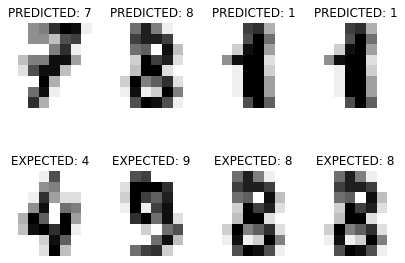

In [16]:
ex = []
pred = []
# separate the fist 4 values inside of the list of wrong values for visualizatoin
if len(wrong)>3:
    n = 4
else:
    n= len(wrong)
for i in range(n):
    p = wrong[i][0]
    e = wrong[i][1]
    pred.append((digits.images[p],p))
    ex.append((digits.images[e],e))
# build image for comparison
_,axes = plt.subplots(2, n,figsize=(7, 5))
for ax, (image, label) in zip(axes[0, :], pred[:n]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('PREDICTED: %i' % label)
    ax.set_axis_off()
for ax, (image, label) in zip(axes[1, :], ex[:n]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('EXPECTED: %i' % label)
    ax.set_axis_off()

The image above shows the first four values the model *predicted* incorrectly and the target value that was expected. The estimator used in this example incorrectly predicted six targets,yet, still achieved an impressive accuracy of 98.33%

In [17]:
print(f'{knn.score(X_test,y_test):.2%}')

98.89%


The accuracy of classification estimators can also be checked by using a **confusion matrix**. This visual will show the correct and incorrect predicted values (sometimes referred to *hits* and *missses*) for a given class. The `y_true` keyword argument specifies the test sample's actual classe. The `y_pred` specifies the predicted digits for those images. The incorrect predictions are shown on the diagonal from top-left to bottom-right. This is known as **principle diagonal**. The non-zero values that are not in the **principle diagonal** indicate incorrect predictions.

In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
confusion

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

The `sklearn.metrics` module also provides the function `classification_report`. This funciton will produce a table of **classification metrics** based on expected and predicted values. 

* Precision - total number of correct predicitons for a given digit divided by the total number of predictions for that digit 

* Recall - total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit

* f1-score - The average of the *precision* and *recall*

* Support - The number of samples with a given expected value. For exapmle: 50 samples were labeled as 4s, and 38 samples were labeled as 5s

More information on those metrics is provided.

__[More info on classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)__

__[More info on averages in report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)__

In [19]:
from sklearn.metrics import classification_report
names = [str(d) for d in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      1.00      0.98        41
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        36
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        28
           7       0.98      1.00      0.99        40
           8       0.97      0.94      0.96        34
           9       1.00      0.97      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



A `heatmap` from `seaborn` can help improve a confusion matrix by displaying values as colors, with values of higher magnitude displayed as more intense colors. *Seaborn's* graphing functions work with two-dimensional data. Using *Pandas* `pd.DataFrame` will allow *Seaborn* to automatically label its visualizations using the column names and row indices

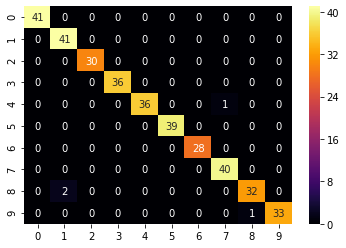

In [20]:
import pandas as pd
import seaborn as sns
confusion_df = pd.DataFrame(confusion,
                            index=range(10),
                            columns=range(10))
axes = sns.heatmap(confusion_df,annot=True,
                  cmap = 'inferno')

## KFold Class

**K-fold Cross-Validation** enables the use of all of the data for *both* training *and* testing, to give a better sense of how well the model will make predictions for new data by repeatedly trainig and tseting the model with different portions of the dataset. **KFold** splits the dataset into *k* equal-sized *folds* (not related to KNN). The model is then repeatedly trained with *k*-1 folds and tested with the remaining *folds* of the model.

For example using **10 Folds**:
* 1. Train model with folds 1-9, then test with fold 10
* 2. Train model with folds 1-8 and 10, then test with fold 9
* 3. Train model with folds 1-7 and 9-10, then test with fold 8
* 4. cycle continues until each fold is used

`Scikit-learn` provides `KFold` class and `cross_val_score` to help with training and test cycles.

* `n_splits = 10` specifies number of Folds

* `shuffle = True` causes the KFold object to randomize the data by shuffling it before splitting it into Folds

* `estimator=knn` specifies the desired estimator

* `X=digits.data` specifies the samples to use for training and testing

* `y=digits.target` specifies the target predictions for the samples

* `cv=kfold` specifies the cross-validation generator that defines how to split the samples and targets for training and testing

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, shuffle = True)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data,
                        y=digits.target, cv=kfold)
scores

array([1.        , 1.        , 0.97777778, 0.98888889, 0.97777778,
       0.98333333, 0.98333333, 0.99441341, 0.98882682, 0.98882682])

The highest accuracy here was 99%

In [23]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.83%


In [24]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.76%


On average the model was even better than when the model was split 80/20 for training and testing

## Finding Best Model

It can be very difficult to knwo in advance which model is the best to use for machine-learning. Estimators can be compared to determine which is most accuarate in predictions. There are cost and benifits to each of them. More information can be found below. A loop can be used to execute several models. As the loop passes through items in the estimators dictionary, each key-value pair performs the following:

* Unpack the key into `estimator_name` and value into `estimator_object`

* Creates a KFold object that shuffles the data and produces 10 folds. The keyword argument `random_state` is important because it ensures that each estimator works with identical folds

* Evaluates the current `estimator_object` using `cross_val_score`

* Prints the estimator's name, mean and standard deviation of the accuracy scores' computed for each of the 10 folds

__[More info on estimators](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__

In [25]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# create estimators
estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

In [26]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
        f'mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


Displaying the results of three models allows easy inspection of accuracy. In this case, **SVC** may be a better model to use.